**Лабораторная работа 2**

по дисциплине "Технологии аналитической обработки информации"

Выполнил: студент группы КЭ-403 Зусман Михаил Дмитриевич

---
В данной работе используются следующие датасеты:

http://fimi.uantwerpen.be/data/retail.dat

http://fimi.uantwerpen.be/data/kosarak.dat

Github:

Устанавливаем пакет Apyori для использования Association Mining Apriori алгоритма.И подключаем необходимые библиотеки.




In [3]:
!pip install apyori  
import pandas as pd
from apyori import apriori
import time
import matplotlib.pyplot as plt

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=93fa3b7204e53e3798aeb570429866d24d5571ae36d23e0e972023c153579015
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Задаем промежуток уровней достоверности.

In [12]:
min_conf=[]
for i in range(40, 95, 5):
    min_conf.append(i/100)

print(min_conf)

[0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]


Описываем общие функции.

In [33]:
#функция сортировки по достоверности
def sort_conf(association_results):
  for i in range(len(association_results)-1):
    for j in range(0,len(association_results)-i-1):
      if association_results[j][2][0][2] < association_results[j+1][2][0][2] : 
        association_results[j], association_results[j+1] = association_results[j+1], association_results[j] 
  return association_results


In [88]:
def print_results(association_results):

  for item in association_results:
    
    pair = item[0] 
    items = [x for x in pair]

    # Ассоциативное правило
    print("Rule: " + str(items))
    
    #
    base=[x for x in item[2][0][0]]
    print("Base" + str(base))
    add=[x for x in item[2][0][1]]
    print("Add: " + str(add))

    #Значение поддержки
    print("Support: " + str(item[1]))

    #Confidence и Lift
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

# Работа с датасетом reatail.dat


In [15]:
retailDatContent = [i.strip().split() for i in open('/content/drive/MyDrive/Colab Notebooks/retail.dat').readlines()]


In [16]:
print(retailDatContent[0])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


In [ ]:
transactions = retailDatContent

Запустим алгоритм Apriori для набора данных с разным уровнем достоверности.

In [42]:
time_retail =[]
list_result_retail=[]

for i in min_conf:
    start=time.perf_counter()
    list_result_retail.append(list( apriori(retailDatContent, min_support=0.1, min_confidence=i, min_lift=1)))
    end=time.perf_counter()
    time_r = end -start
    time_retail.append(time_r)

Выведем количество ассоциативных правил, полученных в результате работы алгоритма, при разных пороговых значениях достоверности.

In [43]:
list_count_of_rules_retail=[]
for j in range(len(min_conf)):
  print('Count of rules(min_support='+str( min_conf[j])+'): '+str(len(list_result_retail[j]))+'\n')
  list_count_of_rules_retail.append(len(list_result_retail[j]))


Count of rules(min_support=0.4): 6

Count of rules(min_support=0.45): 6

Count of rules(min_support=0.5): 5

Count of rules(min_support=0.55): 5

Count of rules(min_support=0.6): 4

Count of rules(min_support=0.65): 3

Count of rules(min_support=0.7): 1

Count of rules(min_support=0.75): 1

Count of rules(min_support=0.8): 0

Count of rules(min_support=0.85): 0

Count of rules(min_support=0.9): 0



Полученные результаты отсортируем по достоверности в порядке убывания значений.

In [89]:
list_print_result=[]

for k in range(len(min_conf)):
  print("min Confidence: "+str(min_conf[k])+"______________________________________________________________________________________________________________________\n")
  print_results(sort_conf(list_result_retail[k]))

min support: 0.4______________________________________________________________________________________________________________________

Rule: ['39', '41']
Base['41']
Add: ['39']
Support: 0.12946620993171662
Confidence: 0.7637336901973905
Lift: 1.3287082307880087
Rule: ['39', '38']
Base['38']
Add: ['39']
Support: 0.1173408044282117
Confidence: 0.663311105411644
Lift: 1.15399770449534
Rule: ['48', '41']
Base['41']
Add: ['48']
Support: 0.10228896803611533
Confidence: 0.6034125125460019
Lift: 1.2625620963825945
Rule: ['48', '39']
Base['39']
Add: ['48']
Support: 0.33055057734624893
Confidence: 0.5750764676862358
Lift: 1.2032726128908013
Rule: ['39']
Base[]
Add: ['39']
Support: 0.5747941289898142
Confidence: 0.5747941289898142
Lift: 1.0
Rule: ['48']
Base[]
Add: ['48']
Support: 0.47792699802636057
Confidence: 0.47792699802636057
Lift: 1.0
min support: 0.45______________________________________________________________________________________________________________________

Rule: ['39', '41']


Построение графика зависимости быстродействия от минимильной Достоверности.

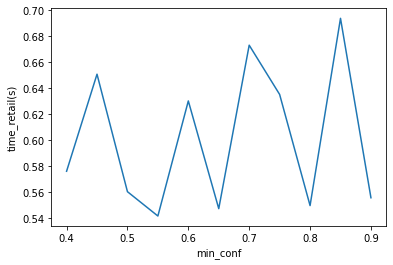

In [45]:
fig, ax = plt.subplots()
ax.plot(min_conf,time_retail)
ax.set(xlabel='min_conf', ylabel='time_retail(s)')
plt.show()

Построение графика зависимости количества наборов от минимильной достоверности.

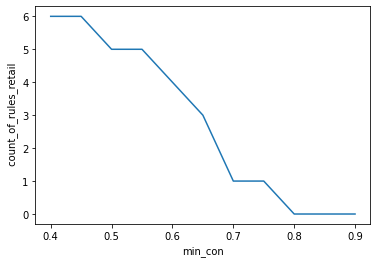

In [46]:
fig, ax = plt.subplots()
ax.plot(min_conf, list_count_of_rules_retail)
ax.set(xlabel='min_con', ylabel=' count_of_rules_retail')
plt.show()

# Работа с датасетом kosarak.dat

In [47]:
kosarakDatContent = [i.strip().split() for i in open('/content/drive/MyDrive/Colab Notebooks/kosarak.dat').readlines()]

In [48]:
print(kosarakDatContent[0])

['1', '2', '3']


Запустим алгоритм Apriori для набора данных с разным уровнем достоверности.

In [51]:
time_kosarak =[]

list_result_kosarak=[]

for i in min_conf:
    start=time.perf_counter()
    list_result_kosarak.append(list( apriori(kosarakDatContent, min_support=0.1, min_confidence=i, min_lift=1)))
    end=time.perf_counter()
    time_r = end -start
    time_kosarak.append(time_r)

Выведем количество ассоциативных правил, полученных в результате работы алгоритма,при разных пороговых значениях поддержки.

In [52]:
list_count_of_rules_kosarak=[]
for j in range(len(min_conf)):
  print('Count of rules(min_support='+str( min_conf[j])+'): '+str(len(list_result_kosarak[j]))+'\n')
  list_count_of_rules_kosarak.append(len(list_result_kosarak[j]))


Count of rules(min_support=0.4): 5

Count of rules(min_support=0.45): 5

Count of rules(min_support=0.5): 4

Count of rules(min_support=0.55): 4

Count of rules(min_support=0.6): 4

Count of rules(min_support=0.65): 3

Count of rules(min_support=0.7): 2

Count of rules(min_support=0.75): 2

Count of rules(min_support=0.8): 2

Count of rules(min_support=0.85): 2

Count of rules(min_support=0.9): 0



Полученные результаты отсортируем по достоверности в порядке убывания значений.

In [90]:
list_print_result=[]

for k in range(len(min_conf)):
  print("min  Confidence: "+str(min_conf[k])+"______________________________________________________________________________________________________________________\n")
  print_results(sort_conf(list_result_kosarak[k]))



min  Confidence: 0.4______________________________________________________________________________________________________________________

Rule: ['3', '6', '11']
Base['3', '11']
Add: ['6']
Support: 0.14513304013527245
Confidence: 0.8908522748409657
Lift: 1.466550821613681
Rule: ['6', '11']
Base['11']
Add: ['6']
Support: 0.3272851974036416
Confidence: 0.889986678203068
Lift: 1.4651258474666244
Rule: ['6', '1']
Base['1']
Add: ['6']
Support: 0.1334472051571613
Confidence: 0.668852077236966
Lift: 1.1010866684771057
Rule: ['6']
Base[]
Add: ['6']
Support: 0.6074472576823077
Confidence: 0.6074472576823077
Lift: 1.0
Rule: ['3']
Base[]
Add: ['3']
Support: 0.4545758493417185
Confidence: 0.4545758493417185
Lift: 1.0
min  Confidence: 0.45______________________________________________________________________________________________________________________

Rule: ['3', '6', '11']
Base['3', '11']
Add: ['6']
Support: 0.14513304013527245
Confidence: 0.8908522748409657
Lift: 1.466550821613681
Rule: ['6

Построение графика зависимости быстродействия от минимильной достоверности.

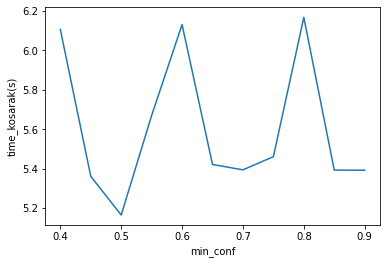

In [54]:
fig, ax = plt.subplots()
ax.plot(min_conf,time_kosarak)
ax.set(xlabel='min_conf', ylabel='time_kosarak(s)')
plt.show()

Построение графика зависимости количества наборов от минимильной достоверности.

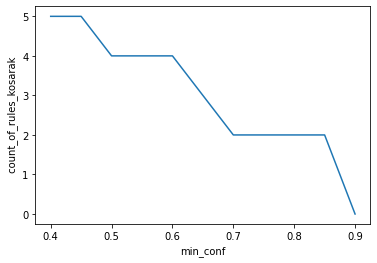

In [55]:
fig, ax = plt.subplots()
ax.plot(min_conf, list_count_of_rules_kosarak)
ax.set(xlabel='min_conf', ylabel=' count_of_rules_kosarak')
plt.show()

Вывод: среди датасетов самые высокие уровни поддерки наблюдаются у правил retail - ['39', '41'], kosarak - ['3', '6', '11']  и ['6', '11']. Также анализируя графики полученные в ходе лабараторной работы можно сказать, что быстродействие на заданных параметра не зависит от уровня минимальной достоверности, скорость выполнения алгортима примерно одинакова при различных показателях поддержки. Исходя из графиков зависимости количества наборов от минимильной достоверности, можно сказать, что количество найденных набор обратно пропорцианально уровню минимальной поддержки.